<font color='orange'><h1><center>CAPSTONE PROJECT: CREDIT CARD FRAUD DETECTION</center></h1></font>

<p style="font-family: Arial; font-size:1.0em;color:blue;">  
<b>Problem Statement:</b> </p>
    The aim of this Capstone project is to predict fraudulent credit card transactions by using machine learning models.

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <b>Business Understanding:</b></p>
Detecting and preventing fraud is one of the vital responsibilities of any financial institutions as its effects it’s business on a very large scale. There is a high chance of losing all the sensitive information about the customers when a fraud takes place. To overcome this from happening, the financial institutions highly invest on the security and technology which can predict the patterns and can notify if there is any chance of occurrence of a fraud or if a transaction is fraud or not.   There are different types of frauds and Skimming is the one of the most common ones, which duplicates the information located on the magnetic strip of the card.  Apart from this, altering genuine cards, creating counterfeit cards and stealing cards are also the other types of fraudulent cases.

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <b>Action plan:</b></p>
As a data scientist, my aim is to build a supervised machine learning which predicts if a transaction as fraud.


In [1]:
# Import the required libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## DATA UNDERSTANDING

In [2]:
# Supress the warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set maximum rows to display = 500.
pd.set_option('display.max_rows', 500)

In [4]:
# Read the dataset.
df = pd.read_csv('creditcard.csv')

# Look at the head of the dataframe.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Look at the shape of the dataframe.
df.shape

(284807, 31)

In [6]:
# Observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <b>Data Understanding:</b><br></p>
The given dataset has 2.85 lac rows of transaction details with 30 features and a label feature which depicts if the transaction is a fraud or not. The data also has a time variable which tell the time from the first transaction.<br> Also, there is amount column which is the transaction amount. Apart from these, there are 28 other numerical variables provided in the dataset.


In [7]:
# Summary statistics of the dataframe.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Get the column-wise null values.
(df.isnull().mean()*100).round(2).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;"><b>  OBSERVATION:</b><br></p>
There are no missing values in the dataset. <br>
Here we will observe the distribution of our classes

## Exploratory Data Analysis

As the data provided only numerical data, extensive exploration of patterns is highly recommended.<br> As PCA has already been performed on the dataset for privacy issues, the data must be already free from missing values. Outlier detection also plays a vital part because the values of the variables for the fraudulent cases might be very different and can be an outlier.<br> As a part of the project, I will perform Univariate and bivariate analysis to observe the patterns in the data.

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(classes)
print()
print(f'Normal share percentage: {round(normal_share, 2)}%')
print(f'Fraud share percentage: {round(fraud_share, 2)}%')

0    284315
1       492
Name: Class, dtype: int64

Normal share percentage: 99.83%
Fraud share percentage: 0.17%


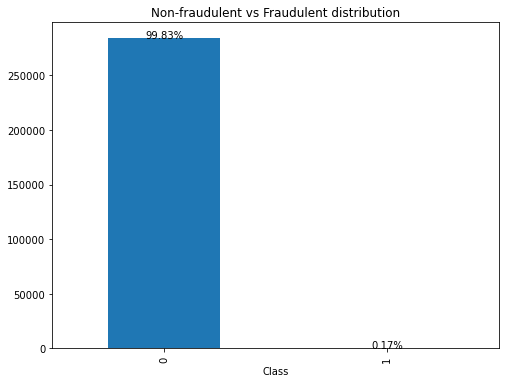

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8,6))
ax = df['Class'].value_counts().plot(kind = 'bar')

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100), ha="center") 

plt.xlabel('Class')
plt.title('Non-fraudulent vs Fraudulent distribution')
plt.show()

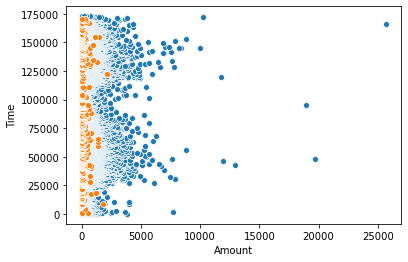

In [11]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(y =df['Time'][df['Class'] ==0],x= df['Amount'][df['Class'] ==0])
sns.scatterplot(y =df['Time'][df['Class'] ==1],x= df['Amount'][df['Class'] ==1])
plt.show()

In [12]:
# Drop unnecessary columns
df.drop(['Time'], axis = 1, inplace = True)

In [13]:
# Look at the head of the dataframe.
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

We split the dataset and perform the K-fold cross validation and stratified K-fold as it is suggested for imbalanced dataset. 

In [14]:
# Put the feature variables to X.
X = df.drop('Class', axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
# Put the response variable to y.
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
# Import the required libraries.
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train.shape, X_test.shape

((227845, 29), (56962, 29))

### Preserve X_test & y_test to evaluate on the test data once you build the model

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.skew()

V1        -3.306334
V2        -4.779484
V3        -2.247962
V4         0.687574
V5        -2.786851
V6         1.937381
V7         3.152665
V8        -8.639485
V9         0.541869
V10        1.132688
V11        0.354102
V12       -2.286654
V13        0.064819
V14       -1.969112
V15       -0.308419
V16       -1.077909
V17       -3.733377
V18       -0.254948
V19        0.106133
V20       -1.960492
V21        3.490183
V22       -0.219171
V23       -6.258558
V24       -0.549854
V25       -0.436292
V26        0.574980
V27       -0.890209
V28        9.978409
Amount    18.193943
dtype: float64

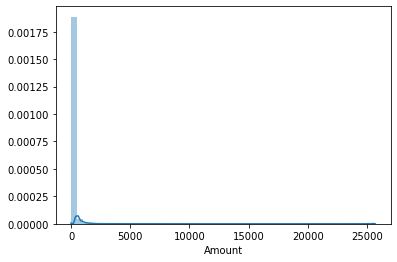

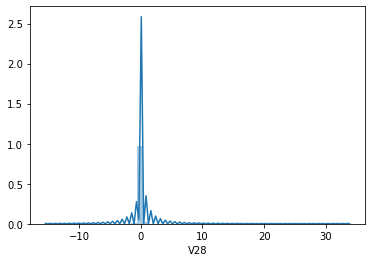

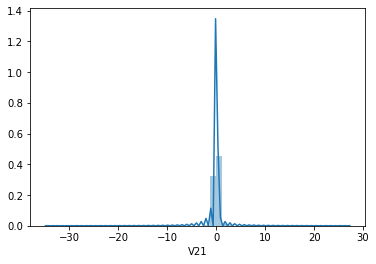

In [20]:
sns.distplot(X_train['Amount'])
plt.show()
sns.distplot(X_train['V28'])
plt.show()
sns.distplot(X_train['V21'])
plt.show()

As there is skewness in the data, it is highly recommended to reduce it by using the log transoform or the Power transform.

In [21]:
# Import the required libraries
from sklearn.preprocessing import PowerTransformer

In [22]:
# Create a power transformer object.
pt = PowerTransformer(copy=False)

# Fit and transform the train set.
X_train = pt.fit_transform(X_train)

# Create the dataframe.
X_train = pd.DataFrame(X_train, columns = X.columns)

# Look at the head of the dataframe.
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.336188,-0.544845,-0.965606,-0.420795,1.098808,2.530347,-1.195983,1.193358,1.254348,-0.106992,...,-0.176355,0.122260,0.393491,0.490592,1.218731,-0.694570,-0.802560,0.182260,-0.090864,-0.604334
1,1.425774,-0.116737,-1.776576,0.252512,2.186342,2.157106,-0.000786,0.641573,0.094536,0.304136,...,-0.296564,0.070475,0.296106,0.045872,1.252675,0.995295,-1.009446,-0.005501,-0.205597,-1.077975
2,-0.754387,0.330483,0.399881,-0.685256,-0.605729,1.414925,-1.789942,-3.636030,0.053256,-2.010828,...,1.674510,-4.186769,0.130424,-0.705914,-1.454362,1.664636,1.729490,0.083143,0.579844,1.205799
3,1.686538,-0.960299,-0.630097,-1.249409,-1.008630,-0.179880,-1.154125,-0.068541,-1.042182,1.564049,...,-0.636737,-0.177824,0.085261,0.327068,-0.924640,-0.562276,-0.262825,0.033199,-0.186850,-0.705232
4,-0.504203,-0.692345,-0.071695,-2.857635,0.512868,-0.008022,0.407953,-0.188334,0.011243,-0.498444,...,-0.358673,-0.323872,-0.258893,-0.022355,-1.981799,-0.588381,-0.223254,-0.092790,-0.190564,0.809789


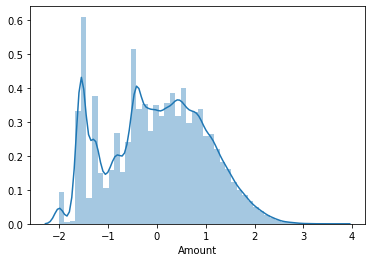

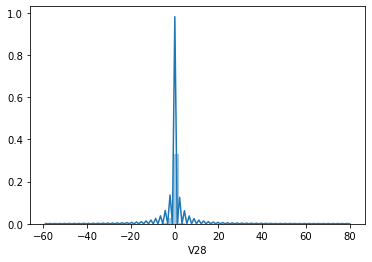

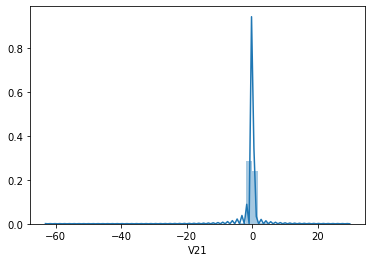

In [23]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(X_train['Amount'])
plt.show()
sns.distplot(X_train['V28'])
plt.show()
sns.distplot(X_train['V21'])
plt.show()

In [24]:
# Transform the test set
X_test = pt.transform(X_test)

# Create the dataframe.
X_test = pd.DataFrame(X_test, columns = X.columns)

# Look at the dataframe.
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.612888,0.938921,-0.834620,-0.962055,1.013637,-1.082636,1.520661,-0.637708,0.333154,0.629991,...,0.511544,0.127609,1.124534,-0.370722,1.254384,-0.297643,0.187989,1.346559,0.901741,0.051860
1,-1.417126,-1.607494,2.178053,-0.752225,2.109658,-1.976296,-1.451882,-0.315661,2.545285,-0.944518,...,-0.669131,-0.398095,0.130116,-1.292190,-0.025126,-0.091979,-2.204635,0.265540,-1.617581,-0.331354
2,-1.640018,1.681809,0.930972,2.077638,0.818726,1.925818,1.165118,-0.726155,1.626696,5.803793,...,2.669907,-1.512342,0.001991,-0.223649,-2.123633,-0.595314,0.224593,1.394731,1.556835,0.739699
3,1.451583,-0.095041,-0.819256,0.346817,-0.029901,-0.850506,0.168725,-0.395860,0.458873,0.086580,...,-0.250938,-0.378384,-0.885681,0.529978,-0.210904,-0.572655,0.505456,-0.169753,-0.177699,-1.540794
4,0.641805,0.920210,-0.959501,1.217385,0.473381,-1.932109,0.689841,-0.518254,-0.549414,-1.549639,...,0.009800,-0.212039,-0.469117,-0.259710,1.069648,1.647954,-0.659282,0.105231,0.332373,-1.387425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,-0.698367,0.065324,2.092873,0.498355,0.036608,1.272863,-0.204598,0.816293,0.417358,-0.791391,...,-0.271042,0.268779,0.960054,0.152927,-1.125739,-0.974248,-0.691748,0.538788,0.401601,0.310749
56958,0.809591,-0.920463,-0.400724,0.679225,-0.846007,-0.023916,-0.258151,-0.100954,1.568967,-0.395058,...,0.441146,-0.064110,-0.672540,0.074626,-0.291821,-0.831112,-1.260629,-0.009126,0.064720,1.494880
56959,-0.778103,0.389917,-0.012841,-2.978587,0.048095,-0.261869,0.211882,0.398118,1.106785,-1.714190,...,-0.290906,-0.150343,-0.550686,-0.165925,-1.614822,-0.771428,-1.839592,0.031458,0.456948,-0.144434
56960,1.554427,-0.733064,-0.694190,-0.794539,-0.478160,0.292430,-0.941108,0.060008,0.010789,0.855366,...,0.029684,0.464901,1.302124,0.114017,0.108333,-0.211174,-0.127281,-0.018165,-0.167356,-0.030612


### Data Scaling

In [25]:
# Import the required libraries.
from sklearn.preprocessing import StandardScaler

In [26]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

# 'Fit' and transform the train set
X_train = scaler.fit_transform(X_train)

# Create the dataframe.
X_train = pd.DataFrame(X_train, columns = X.columns)

# Look at the head of the dataframe.
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.336188,-0.544845,-0.965606,-0.420795,1.098808,2.530347,-1.195983,1.193358,1.254348,-0.106992,...,-0.176355,0.122260,0.393491,0.490592,1.218731,-0.694570,-0.802560,0.182260,-0.090864,-0.604334
1,1.425774,-0.116737,-1.776576,0.252512,2.186342,2.157106,-0.000786,0.641573,0.094536,0.304136,...,-0.296564,0.070475,0.296106,0.045872,1.252675,0.995295,-1.009446,-0.005501,-0.205597,-1.077975
2,-0.754387,0.330483,0.399881,-0.685256,-0.605729,1.414925,-1.789942,-3.636030,0.053256,-2.010828,...,1.674510,-4.186769,0.130424,-0.705914,-1.454362,1.664636,1.729490,0.083143,0.579844,1.205799
3,1.686538,-0.960299,-0.630097,-1.249409,-1.008630,-0.179880,-1.154125,-0.068541,-1.042182,1.564049,...,-0.636737,-0.177824,0.085261,0.327068,-0.924640,-0.562276,-0.262825,0.033199,-0.186850,-0.705232
4,-0.504203,-0.692345,-0.071695,-2.857635,0.512868,-0.008022,0.407953,-0.188334,0.011243,-0.498444,...,-0.358673,-0.323872,-0.258893,-0.022355,-1.981799,-0.588381,-0.223254,-0.092790,-0.190564,0.809789


In [27]:
# Look at the summary statistics of the train dataframe.
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,...,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05
mean,9.676231e-18,-2.629559e-18,3.526576e-17,1.099333e-17,-9.544424e-19,-6.210880e-18,-1.896313e-17,2.175225e-17,4.881787e-18,-3.084305e-17,...,1.114426e-17,1.490916e-17,-4.354743e-18,-2.256309e-18,-1.620079e-17,-2.358441e-17,1.025413e-17,4.461942e-18,-1.566431e-17,-1.603624e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-8.471813e+00,-2.362520e+01,-1.304363e+01,-5.032311e+00,-7.299698e+01,-4.225867e+01,-3.551767e+01,-2.777306e+01,-1.628694e+01,-3.162664e+01,...,-6.712102e+01,-6.302544e+01,-1.327667e+01,-5.822988e+01,-3.541840e+00,-1.451939e+01,-8.015278e+00,-4.543114e+01,-5.903513e+01,-2.012876e+00
25%,-7.232988e-01,-4.550545e-01,-7.129177e-01,-5.680244e-01,-5.103553e-01,-5.571711e-01,-4.463201e-01,-2.766859e-01,-5.599388e-01,-4.753252e-01,...,-2.763418e-01,-3.026505e-01,-7.560247e-01,-2.713616e-01,-6.591836e-01,-6.336014e-01,-6.494919e-01,-1.873731e-01,-1.553779e-01,-7.480678e-01
50%,-2.491299e-01,-4.252040e-02,-2.448857e-02,6.285724e-02,-5.197847e-02,-1.144098e-01,3.362149e-02,-5.551049e-02,5.808750e-03,-4.604106e-02,...,-8.324088e-02,-2.360320e-02,-1.218837e-02,-2.927348e-02,-2.893453e-02,-7.637272e-03,-1.723609e-02,-8.134224e-03,4.428232e-02,2.608875e-02
75%,7.353667e-01,4.771266e-01,6.738958e-01,5.828279e-01,4.356537e-01,4.125610e-01,4.613185e-01,2.579066e-01,5.825383e-01,4.565260e-01,...,1.704962e-01,2.731166e-01,7.203321e-01,2.278698e-01,7.057820e-01,6.578514e-01,5.772444e-01,2.162328e-01,2.510995e-01,7.501829e-01
max,1.864895e+00,2.361499e+01,1.142592e+01,8.517778e+00,2.761582e+01,2.328318e+01,9.612104e+01,3.818052e+01,1.080177e+01,1.643561e+01,...,5.369728e+01,2.968964e+01,1.646595e+01,4.325956e+01,1.235732e+01,1.507507e+01,4.947380e+00,1.006204e+02,7.999767e+01,3.681538e+00


In [28]:
# Transform the test set
X_test = scaler.transform(X_test)

# Create the dataframe.
X_test = pd.DataFrame(X_test, columns = X.columns)

# Look at the dataframe.
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.612888,0.938921,-0.834620,-0.962055,1.013637,-1.082636,1.520661,-0.637708,0.333154,0.629991,...,0.511544,0.127609,1.124534,-0.370722,1.254384,-0.297643,0.187989,1.346559,0.901741,0.051860
1,-1.417126,-1.607494,2.178053,-0.752225,2.109658,-1.976296,-1.451882,-0.315661,2.545285,-0.944518,...,-0.669131,-0.398095,0.130116,-1.292190,-0.025126,-0.091979,-2.204635,0.265540,-1.617581,-0.331354
2,-1.640018,1.681809,0.930972,2.077638,0.818726,1.925818,1.165118,-0.726155,1.626696,5.803793,...,2.669907,-1.512342,0.001991,-0.223649,-2.123633,-0.595314,0.224593,1.394731,1.556835,0.739699
3,1.451583,-0.095041,-0.819256,0.346817,-0.029901,-0.850506,0.168725,-0.395860,0.458873,0.086580,...,-0.250938,-0.378384,-0.885681,0.529978,-0.210904,-0.572655,0.505456,-0.169753,-0.177699,-1.540794
4,0.641805,0.920210,-0.959501,1.217385,0.473381,-1.932109,0.689841,-0.518254,-0.549414,-1.549639,...,0.009800,-0.212039,-0.469117,-0.259710,1.069648,1.647954,-0.659282,0.105231,0.332373,-1.387425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,-0.698367,0.065324,2.092873,0.498355,0.036608,1.272863,-0.204598,0.816293,0.417358,-0.791391,...,-0.271042,0.268779,0.960054,0.152927,-1.125739,-0.974248,-0.691748,0.538788,0.401601,0.310749
56958,0.809591,-0.920463,-0.400724,0.679225,-0.846007,-0.023916,-0.258151,-0.100954,1.568967,-0.395058,...,0.441146,-0.064110,-0.672540,0.074626,-0.291821,-0.831112,-1.260629,-0.009126,0.064720,1.494880
56959,-0.778103,0.389917,-0.012841,-2.978587,0.048095,-0.261869,0.211882,0.398118,1.106785,-1.714190,...,-0.290906,-0.150343,-0.550686,-0.165925,-1.614822,-0.771428,-1.839592,0.031458,0.456948,-0.144434
56960,1.554427,-0.733064,-0.694190,-0.794539,-0.478160,0.292430,-0.941108,0.060008,0.010789,0.855366,...,0.029684,0.464901,1.302124,0.114017,0.108333,-0.211174,-0.127281,-0.018165,-0.167356,-0.030612


In [29]:
# Look at the summary statistics of the test dataframe.
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,-0.002129,0.003017,0.001848,-0.000136,-0.000430,0.003264,-0.000326,0.004432,-0.003639,0.001303,...,0.006533,-0.002515,-0.002119,-0.000398,0.002819,0.006599,-0.001861,0.000940,-0.002687,-0.002778
std,1.000333,1.015160,1.001992,1.001865,1.003480,1.001520,0.994921,1.036315,1.004014,1.006537,...,1.000391,0.995474,1.000019,0.979769,1.001901,1.002854,1.002358,0.977292,1.017946,1.001770
min,-6.730475,-15.258781,-9.891843,-4.610681,-26.791671,-30.158510,-25.412893,-21.217958,-11.019759,-28.196105,...,-34.855633,-39.668259,-10.924600,-35.987493,-3.528122,-11.061451,-5.234105,-21.102976,-30.615960,-2.012876
25%,-0.724222,-0.454454,-0.709314,-0.574428,-0.508695,-0.555702,-0.448667,-0.279754,-0.573944,-0.473706,...,-0.276989,-0.304323,-0.757769,-0.270648,-0.656898,-0.636047,-0.655972,-0.188878,-0.156044,-0.761722
50%,-0.251628,-0.039674,-0.024604,0.068525,-0.050050,-0.114693,0.032499,-0.060239,0.003290,-0.044342,...,-0.082514,-0.024679,-0.010275,-0.030797,-0.027492,-0.002318,-0.022002,-0.009548,0.044591,0.026089
75%,0.735499,0.476372,0.676430,0.586096,0.439096,0.416890,0.460916,0.255523,0.578108,0.454039,...,0.172656,0.273266,0.721773,0.228280,0.712447,0.667897,0.578141,0.214683,0.253680,0.743117
max,1.868199,18.454534,4.142461,6.436100,22.694008,10.107543,35.228817,34.085419,6.735969,10.155834,...,35.516871,29.689645,12.785902,36.089533,10.452812,19.249335,4.525503,30.650560,55.447657,3.371370


## Model-building and hyper parameter tuning: 
Multiple models like Logistic Regression, SVM, Decision Trees and Random Forests should be performed and the best hyper parameters should be chosen by using Grid Search CV and Random Search CV.

# IMBALANCED DATASET MODELS

## MODEL 1 - LOGISTIC REGRESSION

In [30]:
# Import the required libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve

In [31]:
# Create a logistic regression object
model_1 = LogisticRegression()

# Fit the model
model_1.fit(X_train, y_train)

# Predict on the test data.
model_1_pred = model_1.predict(X_test)

In [32]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_1_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.67      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
# Recall score.
model_1_recall_score = round(recall_score(y_test, model_1_pred),2)
model_1_recall_score

0.67

In [34]:
# AUC score
probs = model_1.predict_proba(X_test)[:,1]
model_1_auc_score = round(roc_auc_score(y_test, probs),2)
model_1_auc_score

0.97

In [35]:
# Store the results
data = {'Dataset type':'Imbalanced','Model': 'Logistic Regression', ' Hyper Parameter Tuning':'No', 'ROC_AUC': [model_1_auc_score], 'Recall' :[model_1_recall_score]}
results = pd.DataFrame(data) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67


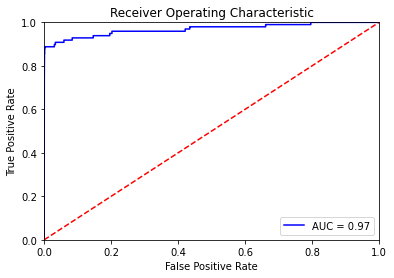

In [36]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_1_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 2 - Hyper parameter tuning LOGISTIC REGRESSION

In [37]:
# Import the required libraries.
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [38]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100],
    'penalty': ['l1', 'l2', 'none']
}

# Instantiate the grid search model
log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   18.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none']},
             return_train_score=True, scoring='recall', verbose=1)

In [39]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.150984,0.012839,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN
1,1.056802,0.179637,0.057284,0.007353,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.409091,0.473282,0.450382,0.444252,0.026562,12,0.446565,0.471483,0.433460,0.450503,0.015770
2,2.818917,0.335311,0.073948,0.025568,0.001,none,"{'C': 0.001, 'penalty': 'none'}",0.583333,0.671756,0.664122,0.639737,0.040005,1,0.660305,0.692015,0.642586,0.664969,0.020447
3,0.197918,0.026553,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN
4,1.816103,0.257157,0.093746,0.044204,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.553030,0.641221,0.603053,0.599102,0.036112,11,0.610687,0.650190,0.581749,0.614209,0.028052
5,2.912655,0.390944,0.067707,0.007366,0.01,none,"{'C': 0.01, 'penalty': 'none'}",0.583333,0.671756,0.664122,0.639737,0.040005,1,0.660305,0.692015,0.642586,0.664969,0.020447
6,0.182837,0.010315,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN
7,2.600831,0.243203,0.067714,0.007371,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.568182,0.664122,0.656489,0.629598,0.043539,10,0.652672,0.692015,0.631179,0.658622,0.025190
8,3.036002,0.428876,0.087959,0.032028,0.1,none,"{'C': 0.1, 'penalty': 'none'}",0.583333,0.671756,0.664122,0.639737,0.040005,1,0.660305,0.692015,0.642586,0.664969,0.020447
9,0.197910,0.026565,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN


In [40]:
# Best score
grid_search.best_score_

0.6397370653095843

In [41]:
# Optimal hyper parameters.
grid_search.best_params_

{'C': 0.001, 'penalty': 'none'}

In [42]:
# Create Logistic Regression object with best hyper parameters.
model_2 = LogisticRegression(C = 0.001, penalty='none')

# Fit the model
model_2.fit(X_train, y_train)

# Predict on the test data.
model_2_pred = model_2.predict(X_test)

In [43]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_2_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.67      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [44]:
# Recall score.
model_2_recall_score = round(recall_score(y_test, model_2_pred),2)
model_2_recall_score

0.67

In [45]:
# AUC score
probs = model_2.predict_proba(X_test)[:,1]
model_2_auc_score = round(roc_auc_score(y_test, probs),2)
model_2_auc_score

0.97

In [46]:
# Store the results.
data = {'Dataset type':'Imbalanced', 'Model': 'Logistic Regression', ' Hyper Parameter Tuning':'Yes', 
        'ROC_AUC': model_2_auc_score, 'Recall' :model_2_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67


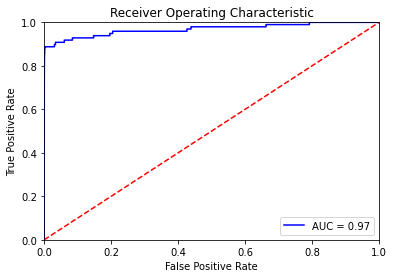

In [47]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_2_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 3 - DECISION TREE

In [48]:
# Import the required libraries.
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Create a decision tree classifier object
model_3 = DecisionTreeClassifier()

# Fit the model
model_3.fit(X_train, y_train)

# Predict on the test data.
model_3_pred = model_3.predict(X_test)

In [50]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_3_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.72      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
# Recall score.
model_3_recall_score = round(recall_score(y_test, model_3_pred),2)
model_3_recall_score

0.72

In [52]:
# AUC score
probs = model_3.predict_proba(X_test)[:,1]
model_3_auc_score = round(roc_auc_score(y_test, probs),2)
model_3_auc_score

0.86

In [53]:
# Store the results.
data = {'Dataset type':'Imbalanced', 'Model': 'Decision tree', ' Hyper Parameter Tuning':'No',
         'ROC_AUC': model_3_auc_score, 'Recall' :model_3_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72


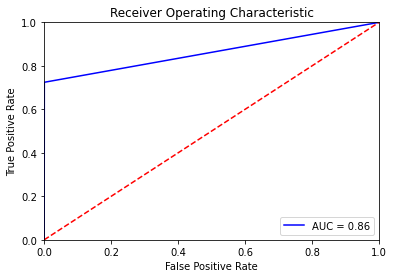

In [54]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_3_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 4- Hyper parameter tuning DECISION TREE

In [55]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [3,4,5],
    'min_samples_leaf': range(10,30,10),
    'min_samples_split': range(10,30,10),
    'criterion': ["entropy", "gini"] }

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': range(10, 30, 10),
                         'min_samples_split': range(10, 30, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.045793,0.922367,0.047740,0.003461,entropy,3,10,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.795455,0.793893,0.786260,0.791869,0.004017,3,0.828244,0.836502,0.794677,0.819808,0.018087
1,6.740334,0.504680,0.055201,0.006418,entropy,3,10,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.795455,0.793893,0.786260,0.791869,0.004017,3,0.828244,0.836502,0.794677,0.819808,0.018087
2,6.415543,1.156793,0.078076,0.022059,entropy,3,20,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.795455,0.786260,0.801527,0.794414,0.006276,1,0.828244,0.832700,0.783270,0.814738,0.022325
3,4.755191,0.023412,0.046244,0.000857,entropy,3,20,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.795455,0.786260,0.801527,0.794414,0.006276,1,0.828244,0.832700,0.783270,0.814738,0.022325
4,8.262880,0.882226,0.052710,0.020324,entropy,4,10,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.757576,0.694656,0.740458,0.730897,0.026562,15,0.786260,0.783270,0.764259,0.777929,0.009743
5,8.704419,1.117686,0.036065,0.006810,entropy,4,10,20,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.757576,0.687023,0.709924,0.718174,0.029388,20,0.786260,0.783270,0.764259,0.777929,0.009743
6,7.850437,0.699174,0.063808,0.024070,entropy,4,20,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.780303,0.671756,0.732824,0.728294,0.044430,16,0.809160,0.768061,0.745247,0.774156,0.026446
7,8.167871,1.403524,0.056112,0.015478,entropy,4,20,20,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.780303,0.687023,0.732824,0.733383,0.038084,14,0.809160,0.768061,0.745247,0.774156,0.026446
8,9.576544,1.046412,0.046877,0.000002,entropy,5,10,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.712121,0.740458,0.786260,0.746280,0.030545,8,0.744275,0.787072,0.779468,0.770272,0.018643
9,8.711247,1.137042,0.055267,0.012489,entropy,5,10,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.712121,0.748092,0.755725,0.738646,0.019013,11,0.744275,0.813688,0.779468,0.779144,0.028339


In [57]:
# Best score
grid_search.best_score_

0.79441360166551

In [58]:
# Optimal hyper parameters.
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [59]:
# Create a decision tree classifier object with optimal parameters.
model_4 = DecisionTreeClassifier(criterion = 'entropy', 
                                 max_depth = 3,
                                 min_samples_leaf = 20,
                                 min_samples_split = 10)

# Fit the model
model_4.fit(X_train, y_train)

# Predict on the test data.
model_4_pred = model_4.predict(X_test)

In [60]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_4_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [61]:
# Recall score.
model_4_recall_score = round(recall_score(y_test, model_4_pred),2)
model_4_recall_score

0.82

In [62]:
# AUC score
probs = model_4.predict_proba(X_test)[:,1]
model_4_auc_score = round(roc_auc_score(y_test, probs),2)
model_4_auc_score

0.93

In [63]:
# Store the results.
data = {'Dataset type':'Imbalanced', 'Model': 'Decision Tree', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_4_auc_score, 'Recall' :model_4_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82


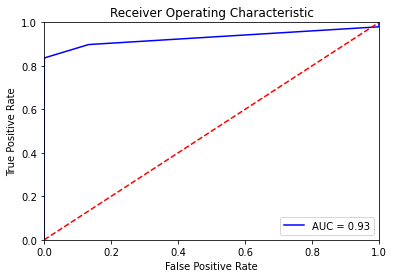

In [64]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_4_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 5 - RANDOM FOREST

In [65]:
# Import the required libraries.
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Create a random forest classifier object
model_5 = RandomForestClassifier()

# Fit the model
model_5.fit(X_train, y_train)

# Predict on the test data.
model_5_pred = model_5.predict(X_test)

In [67]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_5_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
# Recall score.
model_5_recall_score = round(recall_score(y_test, model_5_pred),2)
model_5_recall_score

0.82

In [69]:
# AUC score
probs = model_5.predict_proba(X_test)[:,1]
model_5_auc_score = round(roc_auc_score(y_test, probs),2)
model_5_auc_score

0.95

In [70]:
# Store the results.
data = {'Dataset type':'Imbalanced', 'Model': 'Random Forest', ' Hyper Parameter Tuning':'No', 
        'ROC_AUC': model_5_auc_score, 'Recall' :model_5_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82


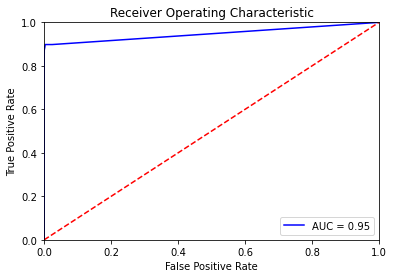

In [71]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_5_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 6 - Hyper parameter tuning RANDOM FORESTS

In [72]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [30,40,50],
    'min_samples_split': [30,40,50],
    'n_estimators': [200,300] 
}

# Instantiate the grid search model
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 118.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [30, 40, 50],
                         'n_estimators': [200, 300]},
             return_train_score=True, scoring='recall', verbose=1)

In [73]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,220.962560,2.312798,1.664861,0.051943,10,30,30,200,"{'max_depth': 10, 'min_samples_leaf': 30, 'min...",0.643939,0.679389,0.671756,0.665028,0.015234,10,0.675573,0.711027,0.680608,0.689069,0.015662
1,327.617706,1.646005,2.401246,0.091893,10,30,30,300,"{'max_depth': 10, 'min_samples_leaf': 30, 'min...",0.643939,0.664122,0.687023,0.665028,0.017600,10,0.667939,0.714829,0.684411,0.689059,0.019423
2,219.878428,0.603654,1.661650,0.072773,10,30,40,200,"{'max_depth': 10, 'min_samples_leaf': 30, 'min...",0.674242,0.671756,0.671756,0.672585,0.001172,4,0.687023,0.707224,0.680608,0.691619,0.011341
3,324.228350,1.681586,2.456482,0.090319,10,30,40,300,"{'max_depth': 10, 'min_samples_leaf': 30, 'min...",0.643939,0.679389,0.664122,0.662484,0.014519,14,0.675573,0.722433,0.673004,0.690337,0.022720
4,218.966034,1.389807,1.703156,0.025105,10,30,50,200,"{'max_depth': 10, 'min_samples_leaf': 30, 'min...",0.636364,0.694656,0.702290,0.677770,0.029444,2,0.675573,0.711027,0.692015,0.692871,0.014487
5,326.508164,4.059869,2.554155,0.154615,10,30,50,300,"{'max_depth': 10, 'min_samples_leaf': 30, 'min...",0.651515,0.679389,0.671756,0.667553,0.011761,8,0.679389,0.718631,0.688213,0.695411,0.016810
6,215.095105,2.995230,1.749532,0.084246,10,40,30,200,"{'max_depth': 10, 'min_samples_leaf': 40, 'min...",0.613636,0.641221,0.648855,0.634571,0.015127,33,0.648855,0.684411,0.642586,0.658617,0.018418
7,327.292531,0.363847,2.408497,0.068862,10,40,30,300,"{'max_depth': 10, 'min_samples_leaf': 40, 'min...",0.621212,0.641221,0.656489,0.639641,0.014445,22,0.637405,0.684411,0.642586,0.654800,0.021044
8,216.886525,1.929823,1.620395,0.070556,10,40,40,200,"{'max_depth': 10, 'min_samples_leaf': 40, 'min...",0.621212,0.656489,0.656489,0.644730,0.016629,20,0.660305,0.695817,0.653992,0.670038,0.018410
9,323.955335,1.143424,2.526065,0.081022,10,40,40,300,"{'max_depth': 10, 'min_samples_leaf': 40, 'min...",0.613636,0.641221,0.656489,0.637115,0.017734,30,0.652672,0.676806,0.642586,0.657354,0.014358


In [74]:
# Best score
grid_search.best_score_

0.6802182126609608

In [75]:
# Optimal hyper parameters.
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 30,
 'min_samples_split': 30,
 'n_estimators': 200}

In [77]:
# Create a random forest classifier object with optimal parameters.
model_6 = RandomForestClassifier(
    max_depth = 20,
    min_samples_leaf = 30,
    min_samples_split = 30,
    n_estimators = 200)

# Fit the model
model_6.fit(X_train, y_train)

# Predict on the test data.
model_6_pred = model_6.predict(X_test)

In [78]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_6_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.73      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [79]:
# Recall score.
model_6_recall_score = round(recall_score(y_test, model_6_pred),2)
model_6_recall_score

0.73

In [80]:
# AUC score
probs = model_6.predict_proba(X_test)[:,1]
model_6_auc_score = round(roc_auc_score(y_test, probs),2)
model_6_auc_score

0.98

In [81]:
# Store the results
data = {'Dataset type':'Imbalanced', 'Model': 'Random Forest', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_6_auc_score, 'Recall' :model_6_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73


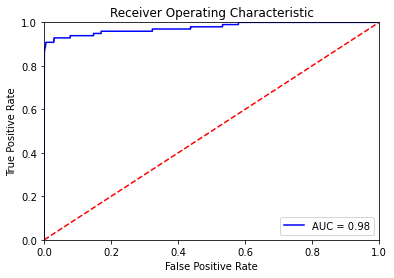

In [82]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_6_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
# initialise the model with optimum hyperparameters
clf = DecisionTreeClassifier(criterion = 'entropy', 
                                 max_depth = 3,
                                 min_samples_leaf = 20,
                                 min_samples_split = 10)
clf.fit(X_train, y_train)

# Recall score
imbalanced_recall_score = round(recall_score(y_test, clf.predict(X_test)),2)
imbalanced_recall_score

0.82

Top var = 17
2nd Top var = 14
3rd Top var = 10


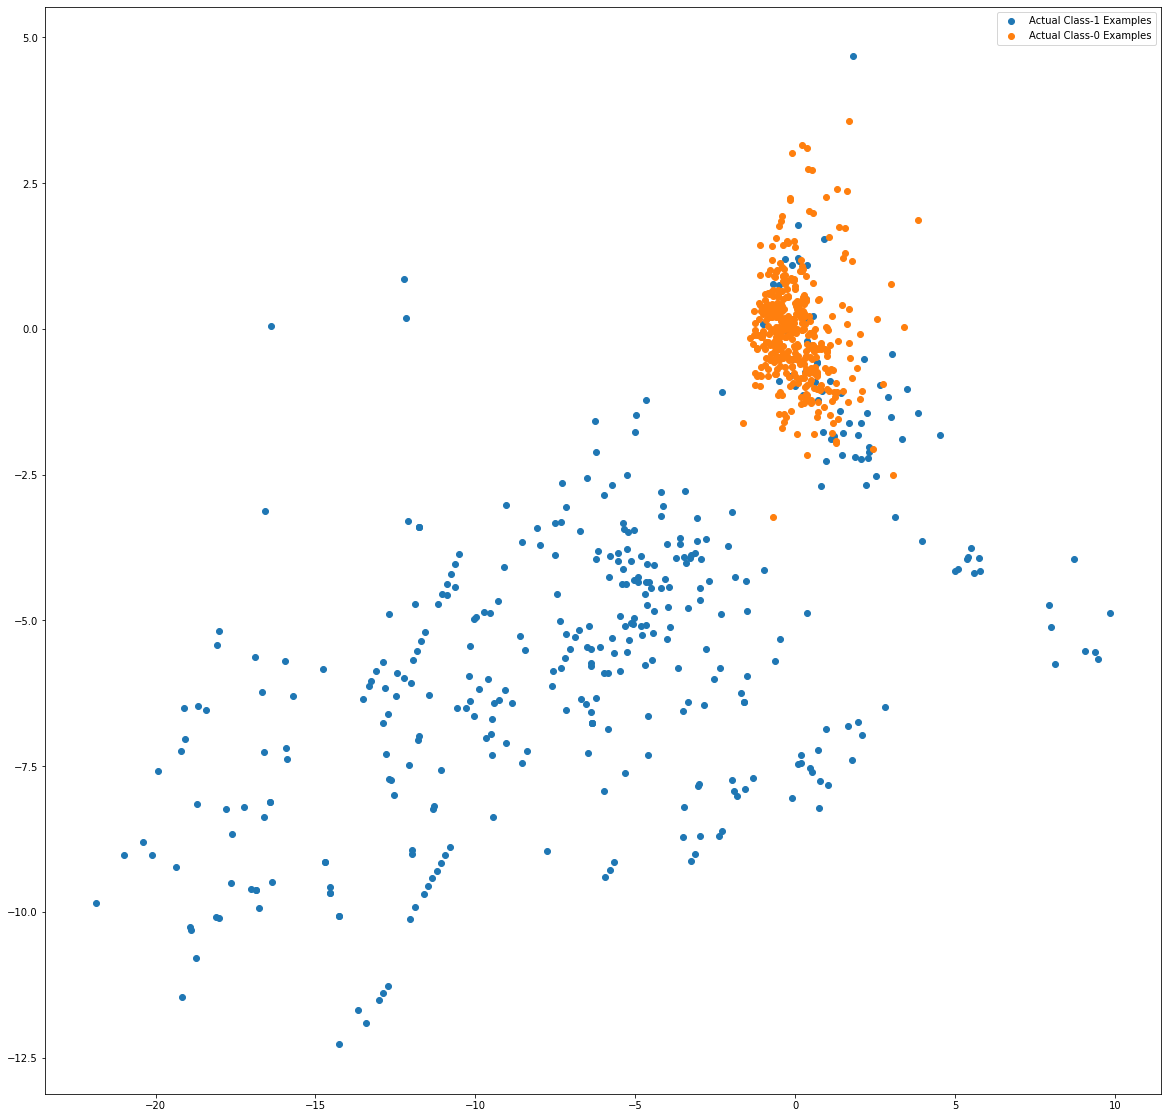

In [84]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes
<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
The ratio of the fraudulent transactions and the total transactions of any financial institution will be very less but the goal is always to make it zero. In the given dataset, there are only 492 fraudulent transaction out of 2.85 lac rows making it a very imbalanced dataset which will highly impact in training a ML model. But, there are various techniques to overcome this issue. SMOTE and ADASYN are the most effectives techniques for data imbalance. The SMOTE algorithm is parameterizes with the help of k-neighbors and the new 
Points are created. Adasync biases the sample space towards points which are located not in homogenous neighborhoods.

</p>


#### Perform class balancing with :

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
- Random Oversampling<br>
- SMOTE<br>
- ADASYN

## Random Oversampling

In [85]:
from imblearn.over_sampling import RandomOverSampler 

#create the RandomOverSampler object
ros = RandomOverSampler(random_state=5)

# fit the train sample
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)

#shape of train samples
X_train_ros.shape, y_train_ros.shape

((454902, 29), (454902,))

## MODEL 7 - Hyper parameter tuning LOGISTIC REGRESSION

In [86]:
# Strtified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'C': [0.0001,0.01,0.1,1,10,100],
    'penalty': ['l1', 'l2', 'none', 'elasticnet']
}

# Instantiate the grid search model
log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet']},
             return_train_score=True, scoring='recall', verbose=1)

In [87]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.208317,0.019463,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
1,2.229208,0.092261,0.109375,0.000004,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.907303,0.905575,0.905285,0.906054,0.000891,12,0.905430,0.906294,0.906439,0.906054,0.000445
2,4.010447,0.434798,0.130210,0.007364,0.0001,none,"{'C': 0.0001, 'penalty': 'none'}",0.930016,0.929145,0.928947,0.929369,0.000464,1,0.929046,0.929482,0.929580,0.929369,0.000232
3,0.255159,0.053180,0.000000,0.000000,0.0001,elasticnet,"{'C': 0.0001, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN
4,0.291666,0.014733,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
5,3.453169,0.055595,0.119795,0.007359,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.930016,0.929145,0.928947,0.929369,0.000464,1,0.929046,0.929482,0.929580,0.929369,0.000232
6,4.005248,0.335196,0.109372,0.000016,0.01,none,"{'C': 0.01, 'penalty': 'none'}",0.930016,0.929145,0.928947,0.929369,0.000464,1,0.929046,0.929482,0.929580,0.929369,0.000232
7,0.239590,0.007366,0.000000,0.000000,0.01,elasticnet,"{'C': 0.01, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
8,0.312497,0.044198,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
9,3.713580,0.060293,0.130217,0.007375,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.930016,0.929145,0.928947,0.929369,0.000464,1,0.929046,0.929482,0.929580,0.929369,0.000232


In [88]:
# Best score
grid_search.best_score_

0.9293694026405688

In [89]:
# Optimal hyper parameters.
grid_search.best_params_

{'C': 0.0001, 'penalty': 'none'}

In [90]:
# Create Logistic Regression object with best hyper parameters.
model_7 = LogisticRegression(C = 0.0001, penalty='none')

# Fit the model
model_7.fit(X_train_ros, y_train_ros)

# Predict on the test data.
model_7_pred = model_7.predict(X_test)

In [91]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_7_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [92]:
# Recall score.
model_7_recall_score = round(recall_score(y_test, model_7_pred),2)
model_7_recall_score

0.92

In [93]:
# AUC score
probs = model_7.predict_proba(X_test)[:,1]
model_7_auc_score = round(roc_auc_score(y_test, probs),2)
model_7_auc_score

0.97

In [94]:
# Store the results.
data = {'Dataset type':'Balanced - Random Oversampling', 'Model': 'Logistic Regression', ' Hyper Parameter Tuning':'Yes', 
        'ROC_AUC': model_7_auc_score, 'Recall' :model_7_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92


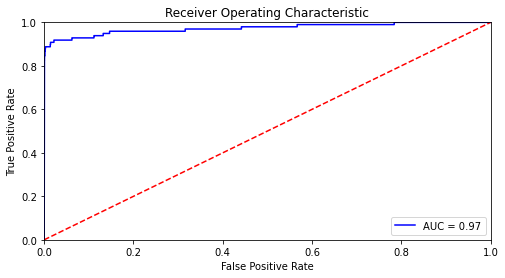

In [96]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_7_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 8 - DECISION TREE

In [97]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [3],
    'min_samples_leaf': range(10,30,10),
    'min_samples_split': range(10,30,10),
    'criterion': ["entropy", "gini"] }

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   15.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3],
                         'min_samples_leaf': range(10, 30, 10),
                         'min_samples_split': range(10, 30, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [98]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.189990,0.085218,0.109369,2.209658e-02,entropy,3,10,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.940633,0.939143,0.938879,0.939552,0.000772,1,0.939011,0.939756,0.939888,0.939552,0.000386
1,5.221568,0.057527,0.125010,6.416172e-06,entropy,3,10,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.940633,0.939143,0.938879,0.939552,0.000772,1,0.939011,0.939756,0.939888,0.939552,0.000386
2,5.247715,0.077289,0.114588,1.949258e-02,entropy,3,20,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.940633,0.939143,0.938879,0.939552,0.000772,1,0.939011,0.939756,0.939888,0.939552,0.000386
3,5.410129,0.051559,0.109375,1.275873e-02,entropy,3,20,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.940633,0.939143,0.938879,0.939552,0.000772,1,0.939011,0.939756,0.939888,0.939552,0.000386
4,3.722617,0.044811,0.093751,1.275494e-02,gini,3,10,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.930728,0.927853,0.928842,0.929141,0.001193,5,0.928347,0.929785,0.929290,0.929141,0.000596
5,3.807165,0.071032,0.098960,7.363842e-03,gini,3,10,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.930728,0.927853,0.928842,0.929141,0.001193,5,0.928347,0.929785,0.929290,0.929141,0.000596
6,3.839027,0.200237,0.083335,1.472971e-02,gini,3,20,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.930728,0.927853,0.928842,0.929141,0.001193,5,0.928347,0.929785,0.929290,0.929141,0.000596
7,3.599441,0.058927,0.062498,3.371748e-07,gini,3,20,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.930728,0.927853,0.928842,0.929141,0.001193,5,0.928347,0.929785,0.929290,0.929141,0.000596


In [99]:
# Best score
grid_search.best_score_

0.9395518155558781

In [100]:
# Optimal hyper parameters.
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [101]:
# Create a decision tree classifier object with optimal parameters.
model_8 = DecisionTreeClassifier(criterion = 'entropy', 
                                 max_depth = 3,
                                 min_samples_leaf = 10,
                                 min_samples_split = 10)

# Fit the model
model_8.fit(X_train_ros, y_train_ros)

# Predict on the test data.
model_8_pred = model_8.predict(X_test)

In [102]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_8_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     56962



In [103]:
# Recall score.
model_8_recall_score = round(recall_score(y_test, model_8_pred),2)
model_8_recall_score

0.91

In [104]:
# AUC score
probs = model_8.predict_proba(X_test)[:,1]
model_8_auc_score = round(roc_auc_score(y_test, probs),2)
model_8_auc_score

0.94

In [105]:
# Store the results.
data = {'Dataset type':'Balanced - Random Oversampling', 'Model': 'Decision Tree', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_8_auc_score, 'Recall' :model_8_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91


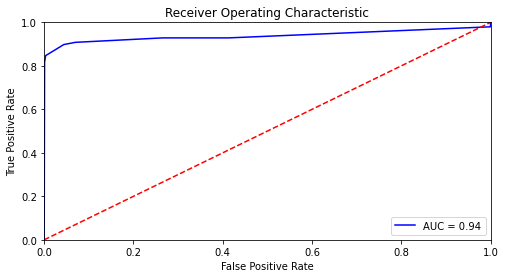

In [107]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_8_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 9 - Hyper parameter tuning RANDOM FORESTS

In [108]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [13,15,17],
    'min_samples_leaf': range(30, 50, 10),
    'min_samples_split': range(30, 50, 10),
    'n_estimators': [100, 200] }

# Instantiate the grid search model
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 37.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17],
                         'min_samples_leaf': range(30, 50, 10),
                         'min_samples_split': range(30, 50, 10),
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='recall', verbose=1)

In [109]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,150.122418,4.717354,2.203143,0.058463,13,30,30,100,"{'max_depth': 13, 'min_samples_leaf': 30, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1,301.618414,1.417429,4.781285,0.267307,13,30,30,200,"{'max_depth': 13, 'min_samples_leaf': 30, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
2,150.454718,2.145361,2.229188,0.041013,13,30,40,100,"{'max_depth': 13, 'min_samples_leaf': 30, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
3,298.736669,1.703506,4.406285,0.113393,13,30,40,200,"{'max_depth': 13, 'min_samples_leaf': 30, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
4,150.157394,0.162868,2.432321,0.062939,13,40,30,100,"{'max_depth': 13, 'min_samples_leaf': 40, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
5,303.887678,2.634806,4.343782,0.125650,13,40,30,200,"{'max_depth': 13, 'min_samples_leaf': 40, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
6,154.902198,3.697363,2.265643,0.067508,13,40,40,100,"{'max_depth': 13, 'min_samples_leaf': 40, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
7,299.439700,3.972993,4.208394,0.032106,13,40,40,200,"{'max_depth': 13, 'min_samples_leaf': 40, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
8,152.532395,2.208850,2.375006,0.165885,15,30,30,100,"{'max_depth': 15, 'min_samples_leaf': 30, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
9,301.444905,2.907915,4.588571,0.231880,15,30,30,200,"{'max_depth': 15, 'min_samples_leaf': 30, 'min...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


In [110]:
# Best score
grid_search.best_score_

1.0

In [111]:
# Optimal hyper parameters.
grid_search.best_params_

{'max_depth': 13,
 'min_samples_leaf': 30,
 'min_samples_split': 30,
 'n_estimators': 100}

In [112]:
# Create a random forest classifier object with optimal parameters.
model_9 = RandomForestClassifier(
    max_depth = 13,
    min_samples_leaf = 30,
    min_samples_split = 30,
    n_estimators = 100)

# Fit the model
model_9.fit(X_train_ros, y_train_ros)

# Predict on the test data.
model_9_pred = model_9.predict(X_test)

In [113]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_9_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.85      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [114]:
# Recall score.
model_9_recall_score = round(recall_score(y_test, model_9_pred),2)
model_9_recall_score

0.85

In [115]:
# AUC score
probs = model_9.predict_proba(X_test)[:,1]
model_9_auc_score = round(roc_auc_score(y_test, probs),2)
model_9_auc_score

0.97

In [116]:
# Store the results
data = {'Dataset type':'Balanced - Random Oversampling', 'Model': 'Random Forest', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_9_auc_score, 'Recall' :model_9_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85


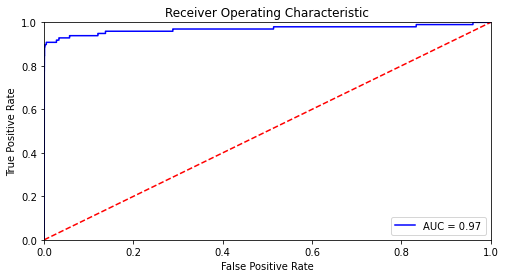

In [118]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_9_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SMOTE 

In [119]:
from imblearn.over_sampling import SMOTE

# create a SMOTE object
smote = SMOTE(random_state=5)

# fit on train sample
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

## MODEL 10 - Hyper parameter tuning LOGISTIC REGRESSION

In [120]:
# Strtified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'C': [0.0001,0.01,0.1,1,10,100],
    'penalty': ['l1', 'l2', 'none', 'elasticnet']
}

# Instantiate the grid search model
log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet']},
             return_train_score=True, scoring='recall', verbose=1)

In [121]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.266851,0.000000,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
1,2.229456,0.122333,0.123284,0.011330,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.896923,0.896343,0.894997,0.896088,0.000807,12,0.895742,0.896019,0.896290,0.896017,0.000223
2,3.864614,0.245180,0.119797,0.014732,0.0001,none,"{'C': 0.0001, 'penalty': 'none'}",0.933353,0.930992,0.929541,0.931295,0.001571,1,0.931084,0.932093,0.930735,0.931304,0.000576
3,0.291643,0.019448,0.000000,0.000000,0.0001,elasticnet,"{'C': 0.0001, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN
4,0.307287,0.019489,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
5,3.406244,0.243461,0.104177,0.007366,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.928354,0.928209,0.925452,0.927338,0.001335,11,0.926600,0.929000,0.926633,0.927411,0.001124
6,3.583381,0.191522,0.119788,0.007362,0.01,none,"{'C': 0.01, 'penalty': 'none'}",0.933353,0.930992,0.929541,0.931295,0.001571,1,0.931084,0.932093,0.930735,0.931304,0.000576
7,0.239578,0.019488,0.000000,0.000000,0.01,elasticnet,"{'C': 0.01, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
8,0.244793,0.019490,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
9,3.779472,0.046760,0.152855,0.025903,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.933142,0.930609,0.929277,0.931009,0.001603,10,0.930787,0.931783,0.930497,0.931023,0.000551


In [122]:
# Best score
grid_search.best_score_

0.9312950921297335

In [123]:
# Optimal hyper parameters.
grid_search.best_params_

{'C': 0.0001, 'penalty': 'none'}

In [124]:
# Create Logistic Regression object with best hyper parameters.
model_10 = LogisticRegression(C = 0.0001, penalty='none')

# Fit the model
model_10.fit(X_train_smote, y_train_smote)

# Predict on the test data.
model_10_pred = model_10.predict(X_test)

In [125]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_10_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [126]:
# Recall score.
model_10_recall_score = round(recall_score(y_test, model_10_pred),2)
model_10_recall_score

0.91

In [127]:
# AUC score
probs = model_10.predict_proba(X_test)[:,1]
model_10_auc_score = round(roc_auc_score(y_test, probs),2)
model_10_auc_score

0.97

In [128]:
# Store the results.
data = {'Dataset type':'Balanced - SMOTE', 'Model': 'Logistic Regression', ' Hyper Parameter Tuning':'Yes', 
        'ROC_AUC': model_10_auc_score, 'Recall' :model_10_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85
9,Balanced - SMOTE,Logistic Regression,Yes,0.97,0.91


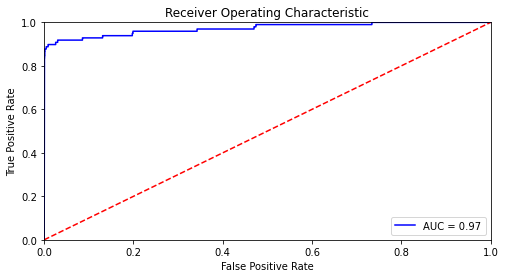

In [130]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_10_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 11 - DECISION TREE

In [131]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [3],
    'min_samples_leaf': range(10,30,10),
    'min_samples_split': range(10,30,10),
    'criterion': ["entropy", "gini"] }

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   23.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3],
                         'min_samples_leaf': range(10, 30, 10),
                         'min_samples_split': range(10, 30, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [132]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.665703,0.105512,0.104168,0.007371,entropy,3,10,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.915019,0.913238,0.912671,0.913643,0.001000,5,0.912896,0.914109,0.914122,0.913709,0.000575
1,8.652622,0.129454,0.099107,0.007574,entropy,3,10,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.915019,0.913238,0.912671,0.913643,0.001000,5,0.912896,0.914109,0.914122,0.913709,0.000575
2,8.863528,0.047436,0.114762,0.014856,entropy,3,20,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.915019,0.913238,0.912671,0.913643,0.001000,5,0.912896,0.914109,0.914122,0.913709,0.000575
3,8.729358,0.026502,0.114585,0.019489,entropy,3,20,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.915019,0.913238,0.912671,0.913643,0.001000,5,0.912896,0.914109,0.914122,0.913709,0.000575
4,5.698303,0.007366,0.098960,0.007366,gini,3,10,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938932,0.936874,0.937164,0.937657,0.000909,1,0.936835,0.938015,0.938457,0.937769,0.000685
5,5.750165,0.033648,0.109376,0.012757,gini,3,10,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938932,0.936874,0.937164,0.937657,0.000909,1,0.936835,0.938015,0.938457,0.937769,0.000685
6,5.515673,0.221340,0.088540,0.019488,gini,3,20,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938932,0.936874,0.937164,0.937657,0.000909,1,0.936835,0.938015,0.938457,0.937769,0.000685
7,5.171911,0.079678,0.062503,0.000004,gini,3,20,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938932,0.936874,0.937164,0.937657,0.000909,1,0.936835,0.938015,0.938457,0.937769,0.000685


In [133]:
# Best score
grid_search.best_score_

0.937656901926129

In [134]:
# Optimal hyper parameters.
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [135]:
# Create a decision tree classifier object with optimal parameters.
model_11 = DecisionTreeClassifier(criterion = 'gini', 
                                 max_depth = 3,
                                 min_samples_leaf = 10,
                                 min_samples_split = 10)

# Fit the model
model_11.fit(X_train_smote, y_train_smote)

# Predict on the test data.
model_11_pred = model_11.predict(X_test)

In [136]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_11_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.93      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.92      0.96     56962



In [137]:
# Recall score.
model_11_recall_score = round(recall_score(y_test, model_11_pred),2)
model_11_recall_score

0.93

In [138]:
# AUC score
probs = model_11.predict_proba(X_test)[:,1]
model_11_auc_score = round(roc_auc_score(y_test, probs),2)
model_11_auc_score

0.95

In [139]:
# Store the results.
data = {'Dataset type':'Balanced - SMOTE', 'Model': 'Decision Tree', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_11_auc_score, 'Recall' :model_11_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85
9,Balanced - SMOTE,Logistic Regression,Yes,0.97,0.91


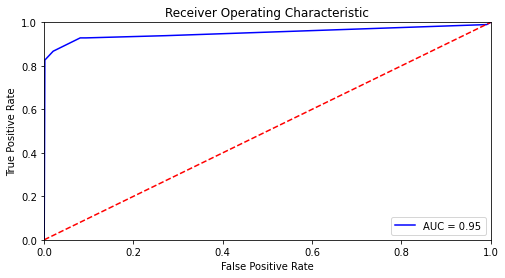

In [142]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_11_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 12 - Hyper parameter tuning RANDOM FORESTS

In [141]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [13,15,17],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,150],
    'n_estimators': [100,200] }

# Instantiate the grid search model
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 133.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='recall', verbose=1)

In [143]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,250.069779,1.251794,2.477265,0.135439,13,50,50,100,"{'max_depth': 13, 'min_samples_leaf': 50, 'min...",0.993629,0.992601,0.991836,0.992689,0.000735,14,0.993933,0.993550,0.993201,0.993561,0.000299
1,496.121765,5.352785,4.823394,0.254125,13,50,50,200,"{'max_depth': 13, 'min_samples_leaf': 50, 'min...",0.993023,0.992442,0.992231,0.992565,0.000335,15,0.993201,0.993425,0.993412,0.993346,0.000103
2,248.864875,2.058920,2.536960,0.086682,13,50,100,100,"{'max_depth': 13, 'min_samples_leaf': 50, 'min...",0.993405,0.991928,0.991849,0.992394,0.000716,20,0.993906,0.992924,0.993181,0.993337,0.000416
3,501.540695,3.534268,4.989104,0.322733,13,50,100,200,"{'max_depth': 13, 'min_samples_leaf': 50, 'min...",0.993537,0.992627,0.991928,0.992697,0.000659,13,0.993887,0.993643,0.993392,0.993640,0.000202
4,250.805333,0.971270,2.342678,0.038995,13,50,150,100,"{'max_depth': 13, 'min_samples_leaf': 50, 'min...",0.992495,0.991361,0.990767,0.991541,0.000717,27,0.992983,0.992449,0.992528,0.992653,0.000235
5,497.612980,2.226605,4.749310,0.116239,13,50,150,200,"{'max_depth': 13, 'min_samples_leaf': 50, 'min...",0.991783,0.991809,0.991018,0.991537,0.000367,28,0.992119,0.992825,0.992482,0.992475,0.000288
6,242.276529,4.297469,2.382058,0.055543,13,100,50,100,"{'max_depth': 13, 'min_samples_leaf': 100, 'mi...",0.990226,0.988973,0.987720,0.988973,0.001023,32,0.990002,0.989884,0.989633,0.989840,0.000154
7,485.103380,7.432285,4.623209,0.120552,13,100,50,200,"{'max_depth': 13, 'min_samples_leaf': 100, 'mi...",0.990081,0.988459,0.988340,0.988960,0.000794,33,0.989824,0.989765,0.990121,0.989903,0.000156
8,243.788143,1.535921,2.406271,0.055608,13,100,100,100,"{'max_depth': 13, 'min_samples_leaf': 100, 'mi...",0.989884,0.988195,0.988116,0.988732,0.000815,36,0.989719,0.989323,0.990062,0.989701,0.000302
9,482.731954,6.784868,4.890663,0.055610,13,100,100,200,"{'max_depth': 13, 'min_samples_leaf': 100, 'mi...",0.990649,0.987984,0.987615,0.988749,0.001351,35,0.990470,0.989257,0.989640,0.989789,0.000507


In [144]:
# Best score
grid_search.best_score_

0.9973972416036861

In [145]:
# Optimal hyper parameters.
grid_search.best_params_

{'max_depth': 17,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 200}

In [146]:
# Create a random forest classifier object with optimal parameters.
model_12 = RandomForestClassifier(max_depth = 17,
 min_samples_leaf = 50,
 min_samples_split = 50,
 n_estimators = 200)

# Fit the model
model_12.fit(X_train_smote, y_train_smote)

# Predict on the test data.
model_12_pred = model_12.predict(X_test)

In [147]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_12_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.89      0.66        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [148]:
# Recall score.
model_12_recall_score = round(recall_score(y_test, model_12_pred),2)
model_12_recall_score

0.89

In [149]:
# AUC score
probs = model_12.predict_proba(X_test)[:,1]
model_12_auc_score = round(roc_auc_score(y_test, probs),2)
model_12_auc_score

0.98

In [150]:
# Store the results
data = {'Dataset type':'Balanced - SMOTE', 'Model': 'Random Forest', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_12_auc_score, 'Recall' :model_12_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85
9,Balanced - SMOTE,Logistic Regression,Yes,0.97,0.91


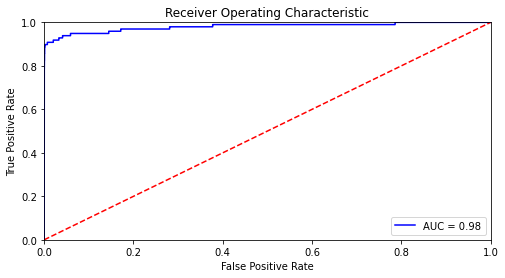

In [151]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_12_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ADASYN

In [152]:
from imblearn import over_sampling

# create ADASYN object
ada = over_sampling.ADASYN(random_state=0)

#fit on train sample
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

## MODEL 13 - Hyper parameter tuning LOGISTIC REGRESSION

In [153]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100],
    'penalty': ['l1', 'l2', 'none']
}

# Instantiate the grid search model
log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   21.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none']},
             return_train_score=True, scoring='recall', verbose=1)

In [154]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.199051,0.020828,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN
1,2.692259,0.145264,0.128410,0.008739,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.792245,0.861198,0.891201,0.848215,0.041429,12,0.910894,0.880611,0.862886,0.884797,0.019821
2,3.525165,0.287396,0.125003,0.000003,0.001,none,"{'C': 0.001, 'penalty': 'none'}",0.825191,0.875046,0.904839,0.868359,0.032858,1,0.924617,0.897487,0.878587,0.900230,0.018891
3,0.249963,0.012875,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN
4,3.342343,0.290208,0.119649,0.007256,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.811989,0.871775,0.902307,0.862024,0.037511,11,0.920225,0.895304,0.874927,0.896819,0.018524
5,3.502191,0.289611,0.130209,0.007363,0.01,none,"{'C': 0.01, 'penalty': 'none'}",0.825191,0.875046,0.904839,0.868359,0.032858,1,0.924617,0.897487,0.878587,0.900230,0.018891
6,0.260276,0.007264,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
7,3.751263,0.482408,0.136706,0.008382,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.823121,0.874703,0.904536,0.867453,0.033631,10,0.924109,0.897263,0.878093,0.899822,0.018873
8,3.571292,0.272982,0.124982,0.000040,0.1,none,"{'C': 0.1, 'penalty': 'none'}",0.825191,0.875046,0.904839,0.868359,0.032858,1,0.924617,0.897487,0.878587,0.900230,0.018891
9,0.267800,0.015696,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN


In [155]:
# Best score
grid_search.best_score_

0.8683588535969243

In [156]:
# Optimal hyper parameters.
grid_search.best_params_

{'C': 0.001, 'penalty': 'none'}

In [157]:
# Create Logistic Regression object with best hyper parameters.
model_13 = LogisticRegression(C = 0.001, penalty='none')

# Fit the model
model_13.fit(X_train_adasyn, y_train_adasyn)

# Predict on the test data.
model_13_pred = model_13.predict(X_test)

In [158]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_13_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.04        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [159]:
# Recall score.
model_13_recall_score = round(recall_score(y_test, model_13_pred),2)
model_13_recall_score

0.93

In [160]:
# AUC score
probs = model_13.predict_proba(X_test)[:,1]
model_13_auc_score = round(roc_auc_score(y_test, probs),2)
model_13_auc_score

0.97

In [161]:
# Store the results.
data = {'Dataset type':'Balanced - ADASYN', 'Model': 'Logistic Regression', ' Hyper Parameter Tuning':'Yes', 
        'ROC_AUC': model_13_auc_score, 'Recall' :model_13_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85
9,Balanced - SMOTE,Logistic Regression,Yes,0.97,0.91


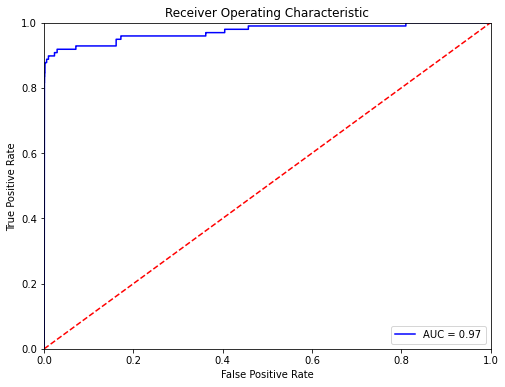

In [162]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_13_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 14- Hyper parameter tuning DECISION TREE

In [163]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [3,4,5],
    'min_samples_leaf': range(10,30,10),
    'min_samples_split': range(10,30,10),
    'criterion': ["entropy", "gini"] }

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': range(10, 30, 10),
                         'min_samples_split': range(10, 30, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [164]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.484351,0.079672,0.125002,0.012759,entropy,3,10,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.777420,0.908784,0.858030,0.848078,0.054089,13,0.857148,0.871247,0.825976,0.851457,0.018915
1,8.489556,0.094041,0.109379,0.012757,entropy,3,10,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.777420,0.908784,0.858030,0.848078,0.054089,13,0.857148,0.871247,0.825976,0.851457,0.018915
2,8.374995,0.022068,0.109378,0.012760,entropy,3,20,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.777420,0.908784,0.858030,0.848078,0.054089,13,0.857148,0.871247,0.825976,0.851457,0.018915
3,8.505249,0.127792,0.098960,0.007364,entropy,3,20,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.777420,0.908784,0.858030,0.848078,0.054089,13,0.857148,0.871247,0.825976,0.851457,0.018915
4,11.104202,0.103907,0.098964,0.007363,entropy,4,10,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.843392,0.758652,0.950092,0.850712,0.078326,9,0.953178,0.822223,0.943485,0.906295,0.059580
5,11.276103,0.169898,0.098968,0.007358,entropy,4,10,20,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.843392,0.758652,0.950092,0.850712,0.078326,9,0.953178,0.822223,0.943485,0.906295,0.059580
6,11.333403,0.183255,0.104169,0.007367,entropy,4,20,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.843392,0.758652,0.950092,0.850712,0.078326,9,0.953178,0.822223,0.943485,0.906295,0.059580
7,11.219429,0.333278,0.124386,0.012774,entropy,4,20,20,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.843392,0.758652,0.950092,0.850712,0.078326,9,0.953178,0.822223,0.943485,0.906295,0.059580
8,13.786462,0.237079,0.098959,0.007368,entropy,5,10,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.836982,0.849802,0.908374,0.865053,0.031077,1,0.955427,0.900560,0.949275,0.935087,0.024543
9,13.630199,0.173222,0.104167,0.007367,entropy,5,10,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.836982,0.849802,0.908374,0.865053,0.031077,1,0.955427,0.900560,0.949275,0.935087,0.024543


In [165]:
# Best score
grid_search.best_score_

0.865052793343403

In [166]:
# Optimal hyper parameters.
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [167]:
# Create a decision tree classifier object with optimal parameters.
model_14 = DecisionTreeClassifier(criterion = 'entropy', 
                                 max_depth = 5,
                                 min_samples_leaf = 10,
                                 min_samples_split = 10)

# Fit the model
model_14.fit(X_train_adasyn, y_train_adasyn)

# Predict on the test data.
model_14_pred = model_14.predict(X_test)

In [168]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_14_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     56864
           1       0.01      0.92      0.02        98

    accuracy                           0.86     56962
   macro avg       0.51      0.89      0.47     56962
weighted avg       1.00      0.86      0.92     56962



In [169]:
# Recall score.
model_14_recall_score = round(recall_score(y_test, model_14_pred),2)
model_14_recall_score

0.92

In [170]:
# AUC score
probs = model_14.predict_proba(X_test)[:,1]
model_14_auc_score = round(roc_auc_score(y_test, probs),2)
model_14_auc_score

0.96

In [171]:
# Store the results.
data = {'Dataset type':'Balanced - ADASYN', 'Model': 'Decision Tree', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_14_auc_score, 'Recall' :model_14_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85
9,Balanced - SMOTE,Logistic Regression,Yes,0.97,0.91


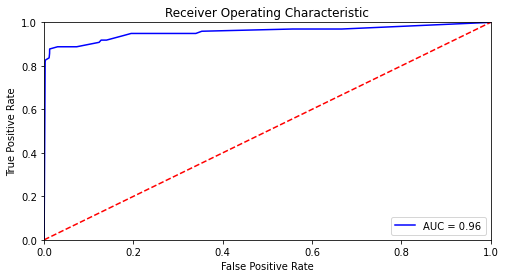

In [172]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_14_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MODEL 15 - Hyper parameter tuning RANDOM FORESTS

In [173]:
# Stratified k fold.
cv_fold = StratifiedKFold(n_splits=3)

# Create the parameter grid.
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,150],
    'n_estimators': [100,200] 
}

# Instantiate the grid search model
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,
                           cv = cv_fold, return_train_score = True, scoring='recall', 
                           verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 92.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='recall', verbose=1)

In [174]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,110.981708,0.726682,1.864917,0.097727,5,50,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.755711,0.831918,0.876931,0.821520,0.050031,52,0.949518,0.914277,0.893142,0.918979,0.023255
1,220.644899,1.060501,3.041677,0.122590,5,50,50,200,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.754801,0.828066,0.879094,0.820654,0.051012,53,0.948522,0.913947,0.896610,0.919693,0.021579
2,109.971821,1.114010,1.580449,0.045921,5,50,100,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.754141,0.854115,0.876429,0.828229,0.053174,46,0.952156,0.916394,0.894922,0.921157,0.023607
3,222.877873,1.699717,3.161467,0.195295,5,50,100,200,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.762556,0.848219,0.896596,0.835790,0.055423,37,0.951206,0.916624,0.899769,0.922533,0.021411
4,111.797176,0.670088,1.677090,0.072545,5,50,150,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.753772,0.852598,0.881534,0.829301,0.054698,40,0.947157,0.910702,0.896261,0.918040,0.021416
5,222.580491,1.374826,3.171888,0.178619,5,50,150,200,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.767159,0.842706,0.877959,0.829275,0.046220,41,0.952816,0.919882,0.900488,0.924395,0.021600
6,110.506942,1.347804,1.703129,0.076546,5,100,50,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.738248,0.827921,0.886308,0.817493,0.060893,54,0.949512,0.909291,0.906318,0.921707,0.019698
7,220.884932,1.807407,2.973963,0.109994,5,100,50,200,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.752018,0.842878,0.884594,0.826496,0.055349,49,0.948002,0.920990,0.899631,0.922874,0.019792
8,110.721826,1.204717,1.645846,0.051560,5,100,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.750317,0.859219,0.878091,0.829209,0.056315,42,0.950837,0.923186,0.892350,0.922124,0.023889
9,219.875937,1.163981,3.072283,0.130348,5,100,100,200,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.761883,0.845911,0.880729,0.829508,0.049886,39,0.950732,0.917106,0.896103,0.921313,0.022500


In [175]:
# Best score
grid_search.best_score_

0.8714670802312589

In [176]:
# Optimal hyper parameters.
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 150,
 'min_samples_split': 150,
 'n_estimators': 100}

In [195]:
# Create a random forest classifier object with optimal parameters.
model_15 = RandomForestClassifier(
    max_depth = 10,
    min_samples_leaf = 150,
    min_samples_split = 150,
    n_estimators = 100)

# Fit the model
model_15.fit(X_train_adasyn, y_train_adasyn)

# Predict on the test data.
model_15_pred = model_15.predict(X_test)

In [196]:
# Evaluation Metrics.
# Classification Report.
print(classification_report(y_pred=model_15_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.91      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [197]:
# Recall score.
model_15_recall_score = round(recall_score(y_test, model_15_pred),2)
model_15_recall_score

0.91

In [198]:
# AUC score
probs = model_15.predict_proba(X_test)[:,1]
model_15_auc_score = round(roc_auc_score(y_test, probs),2)
model_15_auc_score

0.98

In [199]:
# Store the results
data = {'Dataset type':'Balanced - ADASYN', 'Model': 'Random Forest', ' Hyper Parameter Tuning':'Yes',
         'ROC_AUC': model_15_auc_score, 'Recall' :model_15_recall_score}
results = results.append(data, ignore_index=True) 
results

,Dataset type,Model,Hyper Parameter Tuning,ROC_AUC,Recall
0,Imbalanced,Logistic Regression,No,0.97,0.67
1,Imbalanced,Logistic Regression,Yes,0.97,0.67
2,Imbalanced,Decision tree,No,0.86,0.72
3,Imbalanced,Decision Tree,Yes,0.93,0.82
4,Imbalanced,Random Forest,No,0.95,0.82
5,Imbalanced,Random Forest,Yes,0.98,0.73
6,Balanced - Random Oversampling,Logistic Regression,Yes,0.97,0.92
7,Balanced - Random Oversampling,Decision Tree,Yes,0.94,0.91
8,Balanced - Random Oversampling,Random Forest,Yes,0.97,0.85
9,Balanced - SMOTE,Logistic Regression,Yes,0.97,0.91


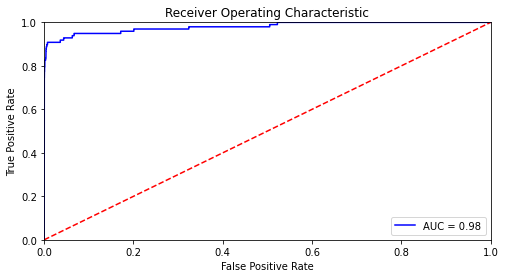

In [200]:
# ROC AUC curve.
fpr, tpr, threshold = roc_curve(y_test, probs, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % model_15_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [201]:
# initialise the model with optimum hyperparameters
clf = LogisticRegression(C = 0.001, penalty='none')

# fit on the balanced dataset
clf.fit(X_train_adasyn, y_train_adasyn)

# print the evaluation score on the X_test by choosing the best evaluation metric
round(recall_score(y_test, clf.predict(X_test)),2)

0.93

### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 11
3rd Top var = 1


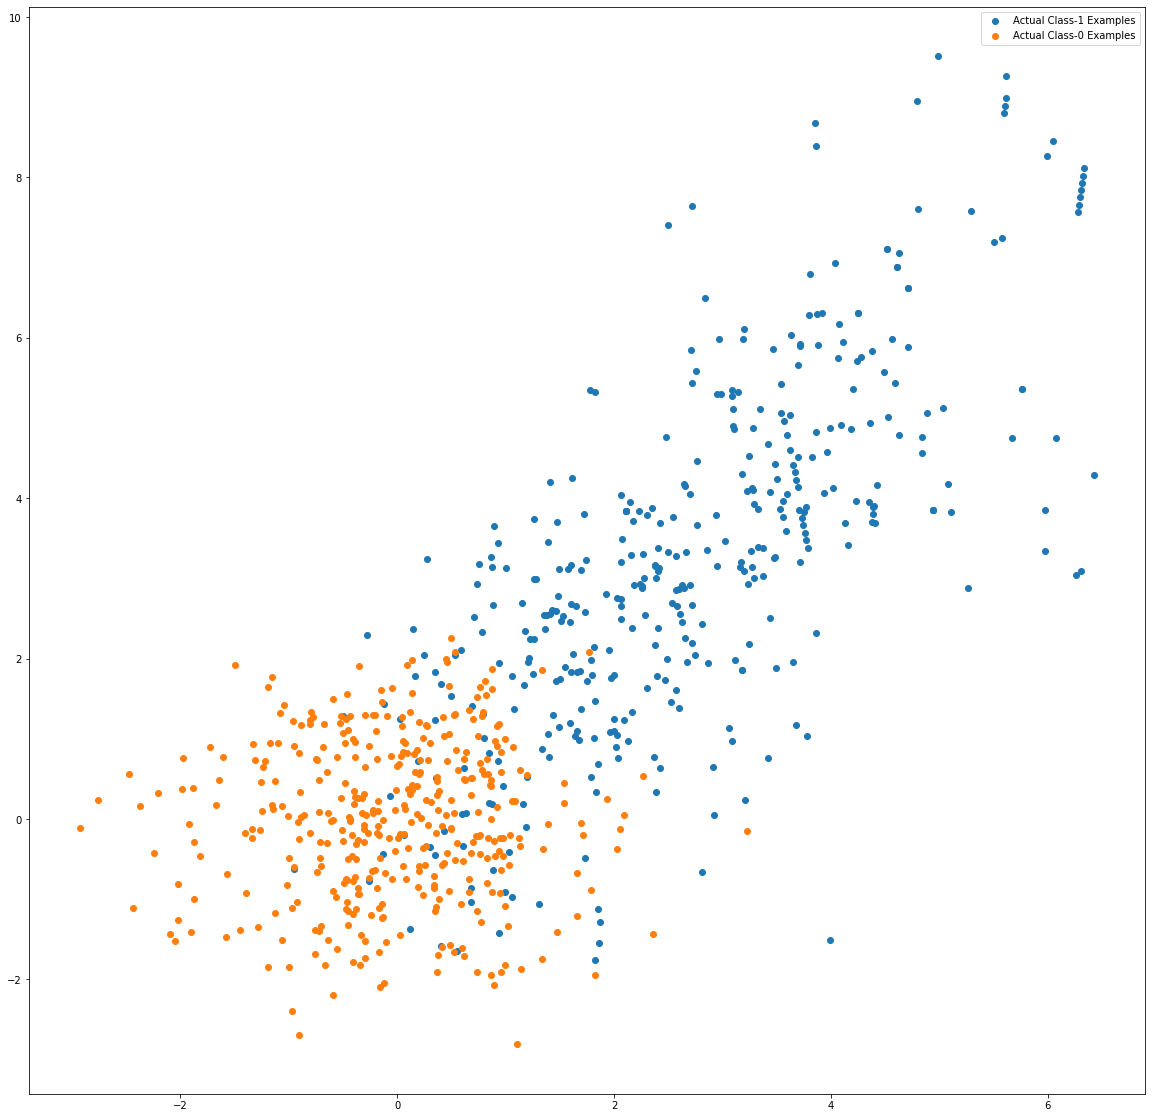

In [204]:
var_imp = []
for i in clf.coef_[0]:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.coef_[0])[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.coef_[0])[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.coef_[0])[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.coef_[0])[-1])
second_top_var_index = var_imp.index(np.sort(clf.coef_[0])[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [208]:
probs = clf.predict_proba(X_test)[:,1]

print('Train auc =', metrics.roc_auc_score(y_test, probs))
fpr, tpr, thresholds = roc_curve(y_test, probs, drop_intermediate=False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9725912452769515
0.8257475001154458


<p style="font-family: Arial; font-size:1.0em;color:blue;"> <b>SUMMARY</b>:<br></p>

Based on all the above models, decision tree performed well on imbalanced dataset with a recall score of **0.82**. However, it is not ideal to perform the classification models on the imbalanced datasets. Among the balancing techniques performed, Decision tree on SMOTE and Logistic regression on ADASYN explained the data with a recall score of **0.93**. But, as the roc auc score depicted by the `Logistic regression model on the ADASYN balanced dataset` is more when compared to that of the other model, we are going ahead with it.